#IMDB Dataset
  - Dataset which have done the tokenization and numeric encoding
  - Labels : Indicate the sentimental review (0 & 1)
  - num_words : Number of words to use in this data (sorted by frequency of appearance)

In [ ]:
!pip install tensorflow

In [2]:
from keras.datasets import imdb
(X1,y1), (X2, y2) = imdb.load_data(num_words=10000)

In [3]:
new_X=[]
new_y=[]
for x,y in zip(X1,y1):
  if len(x)<=500:
    new_X.append(x)
    new_y.append(y)


In [4]:
X1=new_X
y1=new_y

Minimum length of reviews : 11
Maximum length of reviews : 500
Average length of reviews : 196.79460073388083


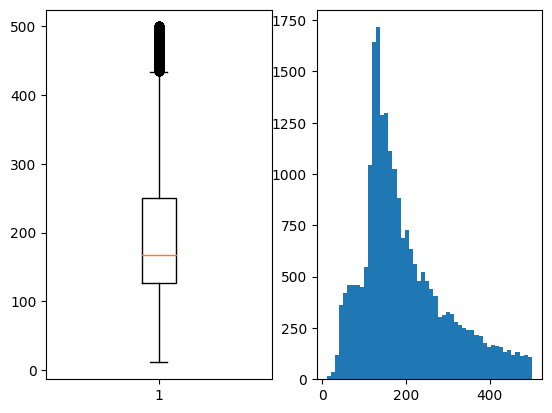

In [5]:
import matplotlib.pyplot as plt
import numpy as np

reviews_length = [len(review) for review in new_X]

print('Minimum length of reviews : {}'.format(np.min(reviews_length)))
print('Maximum length of reviews : {}'.format(np.max(reviews_length)))
print('Average length of reviews : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

- check the dataset word
  - there is a special rule to add 3 to word index for the IMDB dataset.



In [6]:
#index of 0,1,2 in index_to_word are special tokens
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

print('Top 1 word frequency : {}'.format(index_to_word[4]))
print('Top 2 word frequency : {}'.format(index_to_word[5]))
print('Top 3 word frequency : {}'.format(index_to_word[6]))

Top 1 word frequency : the
Top 2 word frequency : and
Top 3 word frequency : a


In [7]:
print(X1[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
from pprint import pprint

#set index of 0,1,2 in index_to_word as token
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

pprint(' '.join([index_to_word[index] for index in X1[0]]))

('<sos> this film was just brilliant casting location scenery story direction '
 "everyone's really suited the part they played and you could just imagine "
 'being there robert <unk> is an amazing actor and now the same being director '
 '<unk> father came from the same scottish island as myself so i loved the '
 'fact there was a real connection with this film the witty remarks throughout '
 'the film were great it was just brilliant so much that i bought the film as '
 'soon as it was released for <unk> and would recommend it to everyone to '
 'watch and the fly fishing was amazing really cried at the end it was so sad '
 'and you know what they say if you cry at a film it must have been good and '
 "this definitely was also <unk> to the two little boy's that played the <unk> "
 'of norman and paul they were just brilliant children are often left out of '
 'the <unk> list i think because the stars that play them all grown up are '
 'such a big profile for the whole film but these ch

#Doc2vec implementation with gensim

In [19]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(words=[index_to_word[index] for index in X1[i]], tags=[i]) for i in range(len(X1))]

d2v_model = Doc2Vec(dm=1,
                vector_size=300,  # Dimensionality of the document vectors
                window=8,         # Maximum distance between the current and predicted word within a sentence
                min_count=10,      # Ignores all words with total frequency lower than this
                workers=4,        # Number of CPU cores to use for training
                epochs=20)        # Number of training epochs

d2v_model.build_vocab(tagged_data)
d2v_model.train(corpus_iterable= tagged_data,
total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

In [15]:
existing_document_vector = d2v_model.dv[0]
print(len(existing_document_vector))

300


- result embedded vectors

In [20]:
doc_vectors = [d2v_model.dv[idx] for idx in range(len(X1))]

## Sentimental analysis

###with embedding vector

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, y1, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=3000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2300
           1       0.89      0.87      0.88      2279

    accuracy                           0.88      4579
   macro avg       0.88      0.88      0.88      4579
weighted avg       0.88      0.88      0.88      4579



### without embeddings

In [22]:
words=[np.pad(wl,(0,500-len(wl)), 'constant', constant_values=(0, 0)) for wl in X1]
words=np.array(words, dtype=object)
words.shape
print(words)
print(len(words))

[[1 14 22 ... 0 0 0]
 [1 194 1153 ... 0 0 0]
 [1 14 47 ... 0 0 0]
 ...
 [1 11 6 ... 0 0 0]
 [1 1446 7079 ... 0 0 0]
 [1 17 6 ... 0 0 0]]
22892


In [72]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(words, y1, test_size=0.2, random_state=42)

X_train_scaler = StandardScaler().fit_transform(X_train)
X_test_scaler=StandardScaler().fit_transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=3000)

# Train the model
model.fit(X_train_scaler, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaler)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.61      0.55      2437
           1       0.53      0.42      0.47      2563

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.51      0.51      0.51      5000



## Visualization of the document vectors in 2-dimension

In [ ]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(np.array(doc_vectors))


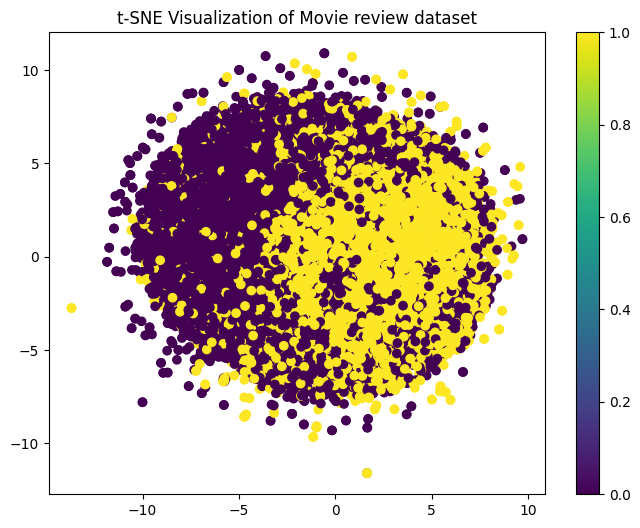

In [36]:
# Plot the data points in the reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y1, cmap='viridis')
plt.title('t-SNE Visualization of Movie review dataset')
plt.colorbar()
plt.show()


# Doc2Vec implementation with Keras

In [48]:
sequence_input=[]
target_id=[]
doc_input=[]

for id, docs in enumerate(words):
  doc_input+=([25000+id]*497)
  tmp1=[]
  tmp2=[]
  for i in range(0, len(docs)-3):
    tmp1.append(docs[i:i+3])
    tmp2.append(docs[i+3])

  sequence_input+=tmp1
  target_id+=tmp2

In [24]:
sequence_input=np.asarray(sequence_input).astype(np.float32)
doc_input=np.asarray(doc_input).astype(np.float32)
target_id=np.asarray(target_id).astype(np.float32)

In [49]:
sequence_input=tf.convert_to_tensor(sequence_input, dtype=tf.float32)
doc_input=tf.convert_to_tensor(doc_input, dtype=tf.float32)
target_id=tf.convert_to_tensor(target_id, dtype=tf.float32)

In [50]:
print(sequence_input.shape)
print(doc_input.shape)
print(target_id.shape)

print(doc_input[0])
print(sequence_input[0])


(11377324, 3)
(11377324,)
(11377324,)
tf.Tensor(25000.0, shape=(), dtype=float32)
tf.Tensor([ 1. 14. 22.], shape=(3,), dtype=float32)


- target id one-hot encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
target_id=np.reshape(target_id, (-1,1))
target_id=enc.fit_transform(target_id)

In [45]:
print(target_id.shape)

(11377324, 9998)


In [26]:
def split(window_size):
    def _lambda(tensor):
        return tf.split(tensor, window_size + 1, axis=1)
    return _lambda


def squeeze(axis=-1):
    def _lambda(tensor):
        import tensorflow as tf
        return tf.squeeze(tensor, axis=axis)
    return _lambda


In [27]:
tokenized_documents=[]
for vocabs in words:
  tmp=[]
  for v in vocabs:
    tmp.append(index_to_word[v])
  tokenized_documents.append(tmp)
print(tokenized_documents[0:2])

# Create a vocabulary
vocab = list(set(word for doc in tokenized_documents for word in doc))
vocab_size = len(vocab)
print(vocab_size)


[['<sos>', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '<unk>', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '<unk>', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '<unk>', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', 'cry', 'at

In [30]:
from keras.models import load_model
from keras.optimizers import SGD
import numpy as np
from keras.layers import Average, Concatenate, Dense, Embedding, Input, Lambda
from keras.models import Model
import tensorflow as tf

# Hyperparameters
embedding_size = 100
window_size=3
lr = 0.001

def PVDM(split,squeeze):
    sequence_input = Input(shape=(window_size,))
    doc_input = Input(shape=(1,))

    embedded_sequence = Embedding(input_dim=vocab_size,
                                      output_dim=embedding_size,
                                      input_length=window_size,
                                      name='doc_embeddings')(sequence_input)
    embedded_doc = Embedding(input_dim=len(words),
                                 output_dim=embedding_size,
                                 input_length=1)(doc_input)

    embedded = Concatenate(axis=1)([embedded_doc, embedded_sequence])
    split = Lambda(split(window_size))(embedded)
    averaged = Average()(split)
    squeezed = Lambda(squeeze(axis=1))(averaged)

    softmax = Dense(vocab_size, activation='softmax')(squeezed)
    model = Model(inputs=[doc_input, sequence_input], outputs=softmax)

    optimizer = SGD(learning_rate=lr, momentum=0.9, nesterov=True)

    model.compile(optimizer=optimizer,
                            loss='categorical_crossentropy',
                            metrics=['categorical_accuracy'])
    return model

In [31]:
PVDM(split, squeeze).summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 100)               2289200   ['input_4[0][0]']             
                                                                                                  
 doc_embeddings (Embedding)  (None, 3, 100)               999900    ['input_3[0][0]']             
                                                                                            

In [32]:
def _doc_embeddings_from_model(keras_model):
    for layer in keras_model.layers:
        if layer.get_config()['name'] == 'doc_embeddings':
            return layer.get_weights()[0]

In [ ]:
batch_size=500
epochs=50

model=PVDM(split, squeeze)
model.fit([doc_input,sequence_input], target_id, batch_size=batch_size, epochs=epochs)